In [341]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [342]:
def resize_gray(img, ratio):
    # Get the current size of the image
    height, width , channels = img.shape

    # Calculate the new dimensions of the image
    new_height = int(height * ratio)
    new_width = int(width * ratio)

    # Resize the image using the new dimensions
    resized_img = cv2.resize(img, (new_width, new_height))
    return resized_img

In [343]:
# # Load and Read image
# img_path = "/home/javad_mtr/Projects/DigitalImageProcessing/HoughTransform/0722922_PE733774_S5.jpg"
# gray_img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)

# # Resize image
# img = resize_gray(gray_img, 0.3)
# plt.imshow(img)

In [344]:
img = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(0, 256, 90):
    for j in range(256):
        if j % 2 == 0:
            for k in range(3):
                img[i, j, k] = np.random.randint(256)

for j in range(0, 256, 70):
    for i in range(256):
        if i % 2 == 0:
            for k in range(3):
                img[i, j, k] = np.random.randint(256)

for p in range(300):
    i = np.random.randint(256)
    j = np.random.randint(256)
    k = np.random.randint(3)
    pixel = np.random.randint(0, 256)
    img[i, j, k] = pixel

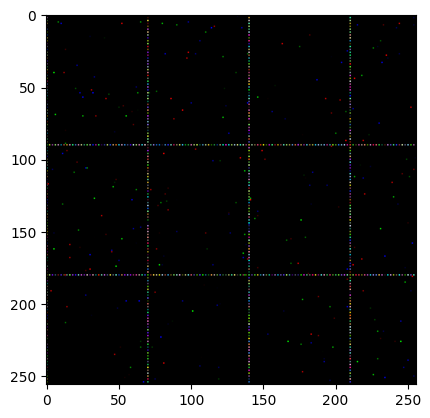

In [345]:
plt.imshow(img)

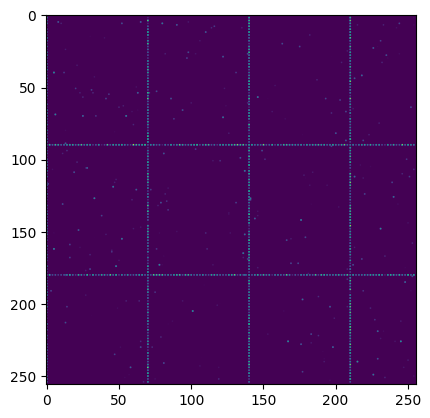

In [346]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

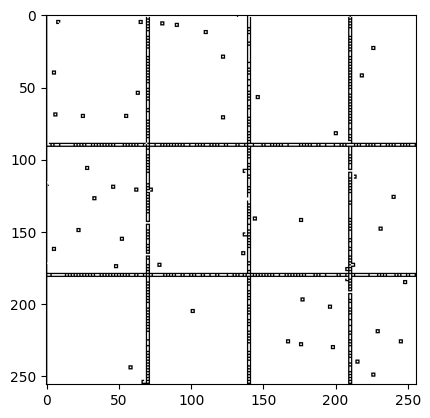

In [347]:
# Detect edges of image
edges = cv2.Canny(gray_img, threshold1=50, threshold2=150)
# edges = cv2.bitwise_not(edges)
plt.imshow(edges, cmap="Greys")

In [348]:
def hough_line(edge):
    # Theta 0 - 180 degree
    # Calculate 'cos' and 'sin' value ahead to improve running time
    theta = np.arange(-90, 90, 0.5)
    cos = np.cos(np.deg2rad(theta))
    sin = np.sin(np.deg2rad(theta))

    # Generate a accumulator matrix to store the values
    rho_range = round(np.sqrt(edge.shape[0]**2 + edge.shape[1]**2))
    accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)

    # Threshold to get edges pixel location (x,y)
    x, y = np.where(edge == 255)

    # Calculate rho value for each edge location (x, y) with all the theta range
    for p in range(len(x)):
        for t in range(len(theta)):
            rho = int(round(x[p] * cos[t] + y[p] * sin[t]))
            accumulator[rho, t] += 1 

    return accumulator

In [349]:
# Function to do hough line transform
accumulator = hough_line(edges)

# Threshold some high values then draw the line
r, theta = np.where(accumulator > 150)

# Draw the detected lines on the image
for p in range(len(r)):
    a = np.cos(theta[p])
    b = np.sin(theta[p])
    x0 = a * r[p]
    y0 = b * r[p]
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

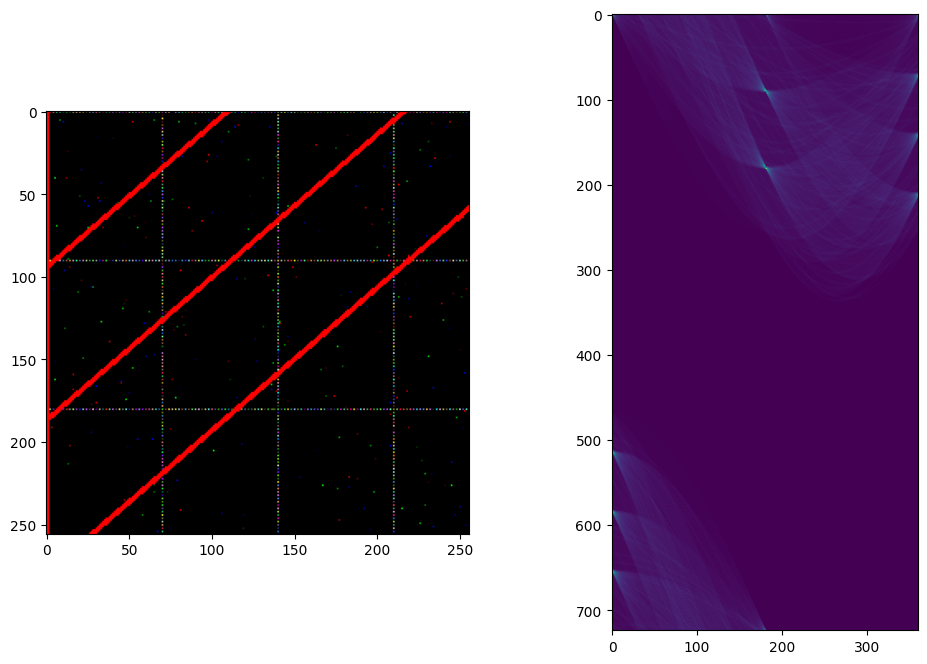

In [350]:
# show result
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(accumulator)
plt.show()